# Import The Libraries

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.utils import img_to_array
from keras.utils import load_img
import matplotlib.pyplot as plt
from glob import glob
import os
from skimage import io
import os
from PIL import Image

In [2]:
folders=glob(r'C:\Users\admin\Desktop\7 Semester\IBM_Project\Final Deliverables\Code_Project_Structure\Dataset Plant Disease\fruit-dataset\fruit-dataset\train\*')

In [3]:
classes=[]
a=0
for i in folders:
    a=a+1
    print(a,end="")
    classes.append(i[144:])
    print(" . "+i[144:]+"\n")

1 . Apple___Black_rot

2 . Apple___healthy

3 . Corn_(maize)___healthy

4 . Corn_(maize)___Northern_Leaf_Blight

5 . Peach___Bacterial_spot

6 . Peach___healthy



In [4]:
width=128
height=128
depth=3
inputShape = (depth, height, width)

# Initializing The Model

In [5]:
model = Sequential()

# ADD CNN Layers

In [6]:
model.add(Conv2D(32, (3, 3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3),input_shape=(128,128,3),activation='relu'))
model.add(Conv2D(64, (3, 3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3),input_shape=(128,128,3),activation='relu'))
model.add(Conv2D(128, (3, 3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

In [7]:
model.add(Dense (units= 40,activation = 'relu'))
model.add(Dense (units= 20,activation = 'relu')) 
model.add(Dense (units= 6, activation = 'softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                    

In [9]:
train_datagen = ImageDataGenerator (rescale = 1./255, shear_range= 0.2,zoom_range= 0.2, horizontal_flip = True) 
test_datagen =ImageDataGenerator (rescale = 1)

# Preprocess The Images

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range= 0.2,zoom_range= 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1)

x_train = train_datagen.flow_from_directory(r'C:\Users\admin\Desktop\7 Semester\IBM_Project\Final Deliverables\Code_Project_Structure\Dataset Plant Disease\fruit-dataset\fruit-dataset\train',target_size=(128,128),batch_size=16, class_mode='categorical')

x_test = test_datagen.flow_from_directory(r'C:\Users\admin\Desktop\7 Semester\IBM_Project\Final Deliverables\Code_Project_Structure\Dataset Plant Disease\fruit-dataset\fruit-dataset\test',target_size=(128,128),batch_size=16, class_mode='categorical')

Found 5384 images belonging to 6 classes.
Found 1686 images belonging to 6 classes.


#  Compile the model

In [11]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Fit the Model

In [12]:
history=model.fit(x_train,steps_per_epoch = 168,epochs = 8,validation_data=x_test)

Epoch 1/8
168/168 [==============================] - 197s 1s/step - loss: 1.4121 - accuracy: 0.4312 - val_loss: 42.0867 - val_accuracy: 0.6797
Epoch 2/8
168/168 [==============================] - 173s 1s/step - loss: 0.7222 - accuracy: 0.7205 - val_loss: 285.5702 - val_accuracy: 0.5231
Epoch 3/8
168/168 [==============================] - 178s 1s/step - loss: 0.4952 - accuracy: 0.8218 - val_loss: 340.5855 - val_accuracy: 0.5368
Epoch 4/8
168/168 [==============================] - 215s 1s/step - loss: 0.3373 - accuracy: 0.8795 - val_loss: 398.4551 - val_accuracy: 0.6062
Epoch 5/8
168/168 [==============================] - 261s 2s/step - loss: 0.4278 - accuracy: 0.8590 - val_loss: 357.4659 - val_accuracy: 0.5291
Epoch 6/8
168/168 [==============================] - 220s 1s/step - loss: 0.2910 - accuracy: 0.8999 - val_loss: 452.5112 - val_accuracy: 0.5190
Epoch 7/8
168/168 [==============================] - 297s 2s/step - loss: 0.2709 - accuracy: 0.9067 - val_loss: 419.2333 - val_accuracy: 

In [13]:
ref=dict(zip(list(x_train.class_indices.values()),list(x_train.class_indices.keys())))
print(ref)

{0: 'Apple___Black_rot', 1: 'Apple___healthy', 2: 'Corn_(maize)___Northern_Leaf_Blight', 3: 'Corn_(maize)___healthy', 4: 'Peach___Bacterial_spot', 5: 'Peach___healthy'}


#  Save the Model

In [14]:
model.save("fruit.h5")

# Load the Model

In [15]:
from tensorflow import keras
loaded=keras.models.load_model("fruit.h5")
print("Loaded")

Loaded


In [16]:
def predictionn(path):
    prob=[]
    import pandas as pd
    a=load_img(path,target_size=(128,128,3))
    a=img_to_array(a)
    plt.imshow(a/255)
    plt.show()
    img = np.array(a)
    #img=image.load_img(path,target_size=(256,256,3))
    #i=image.img_to_array(img)
    i=np.expand_dims(img,axis=0)
    p=loaded.predict(i)

    pred=np.argmax(p)
    
    m=0
    s=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy',
       'Peach___Bacterial_spot','Peach___healthy']

    for i in p:
        for j in i:
            #j=round(j,3)
            prob.append(str(int(j*100))+"%")
    ds=pd.DataFrame(prob,s)
    ds.columns=["Values"]
    print(ds)
    
    prob.sort(reverse=True)
    if pred not in (3,5):
        print(f"\nLeaves are affected by the disease :: {ref[pred]} : {prob[0]}")
    else:
        print(f"\n{ref[pred]} : {prob[0]}")
    
    
    #FERTILIZER RECOMMENDATION
    
#     if((solution[ref[pred]])!=""):
#         print("\nSolution:\n")
#         print(solution[ref[pred]])
#     else:
#         print("As far as plants are healthy!!!")

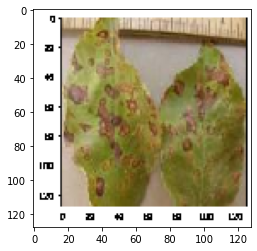

1/1 [==============================] - 1s 1s/step
                                    Values
Apple___Black_rot                       0%
Apple___healthy                         0%
Corn_(maize)___Northern_Leaf_Blight     0%
Corn_(maize)___healthy                  0%
Peach___Bacterial_spot                100%
Peach___healthy                         0%

Leaves are affected by the disease :: Peach___Bacterial_spot : 100%


In [17]:
path=r"C:\Users\admin\Desktop\7 Semester\IBM_Project\Final Deliverables\Code_Project_Structure\Fruit_Test.png"
predictionn(path)